## PROJECT MONKEY POX PREDICTION

<b>AARSHA JOJI - U74440593         
HARITHA KARNA - U46427632          
AKSHIT RAMPERSHAD - U87835413        
SHAMBHAVI MISHRA - U01040066          
SRI VENKATA LIKHITHA DUGGI - U37870238         

<b>PROBLEM STATEMENT:<b>
    
In this notebook, team PARAMOUNT will use the approved dataset to predict monkey pox cases.

Using this dataset, we will create and 'tune' the following models to the data
1) K-NN (with and without fold)
2) Decision Tree
3) Logistic regression
4) ADA boost
5) Gradient Boost
6) Neural Networks 
7) Hyperparameter tuning with GridSearchCV
    
Later, we will compare the results of one of the performance metric of the above methods and decided which model best fits our dataset.

# INTRODUCTION & OVERVIEW



<b> A little info on MonkeyPox:
    
Two outbreaks of a disease resembling the pox occurred in colonies of monkeys held for research in 1958, giving rise to the term "monkeypox," which was then coined. Amid 1970, the Democratic Republic of the Congo saw the first incidence of monkeypox in a time of increased smallpox eradication efforts.
However, a recent outbreak of the viral disease monkeypox was proven to start in May 2022, with a concentration of cases first discovered in the United Kingdom. The first identified case was confirmed on May 6, 2022, and instances that have been documented so far do not have any known travel connections to an endemic area. Cases began to be recorded starting on May 18 from an expanding range of nations and areas, primarily in Europe but also in North and South America, Asia, North Africa, and Australia. In July 2022, the World Health Organization (WHO) announced the monkeypox outbreak as a Public Health Emergency of International Concern, and in August 2022, the U.S. Department of Health and Human Services declared the ongoing spread of the monkeypox virus in the U.S. a Public Health Emergency. As of September 29, 2022, there were 25,613 confirmed cases in 48 states, Washington DC, and Puerto Rico. The CDC continues tracking cases.

The two targets we want to hit using this dataset are

•	Forecast number of monkeypox cases;

•	Explore the demographics and symptoms of the disease


<b> ABOUT our Dataset 
    
This is a dataset generated based on a study published by thebmj and Kaggle.
Number of observations – 25,000
Number of features – 10
Target Variable – MonkeyPox
Classification of target Variable : Binary  
Source link : https://www.bmj.com/content/378/bmj-2022-072410   
    
Dataset link:https://drive.google.com/file/d/1IC3G6cgnYU8yOA08C6CYMVoCu11mrBoF/view?usp=sharing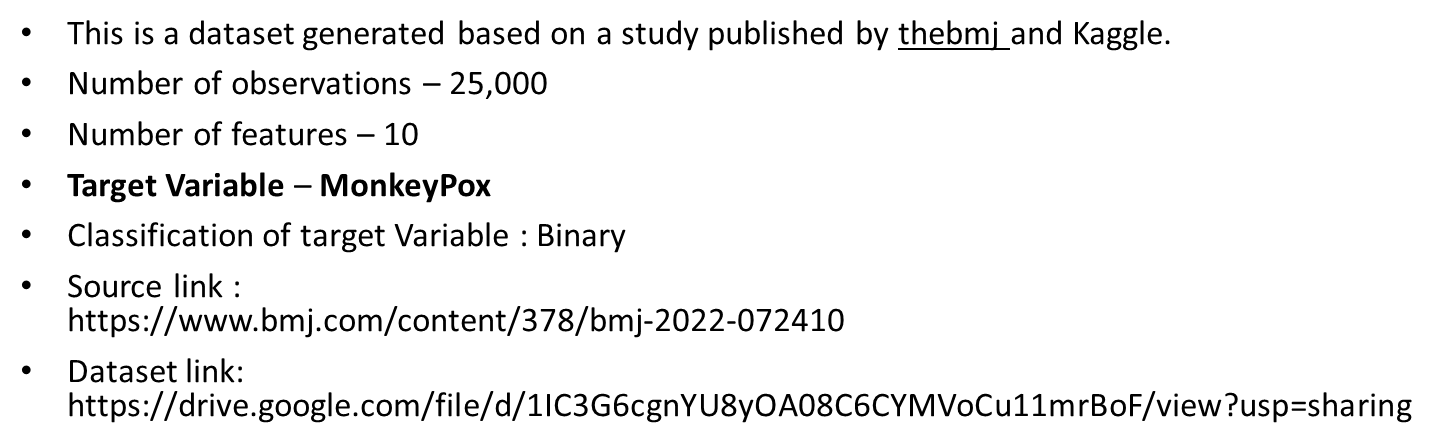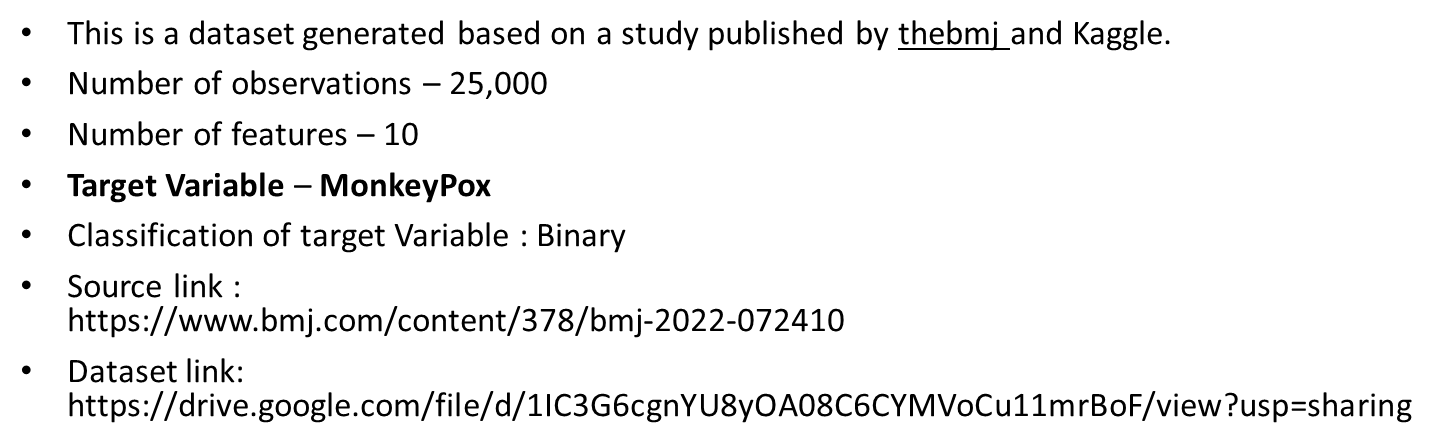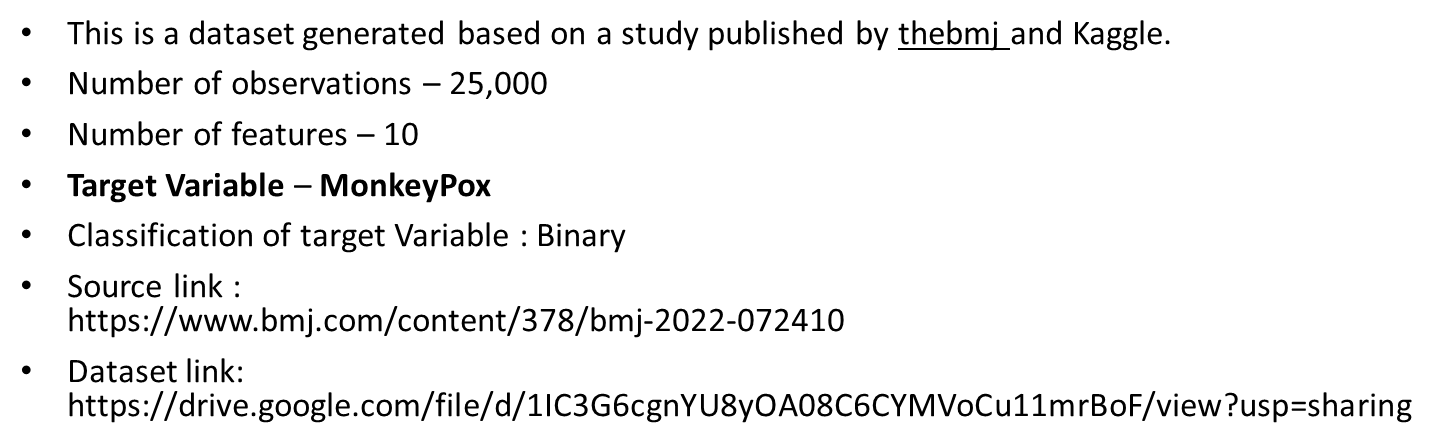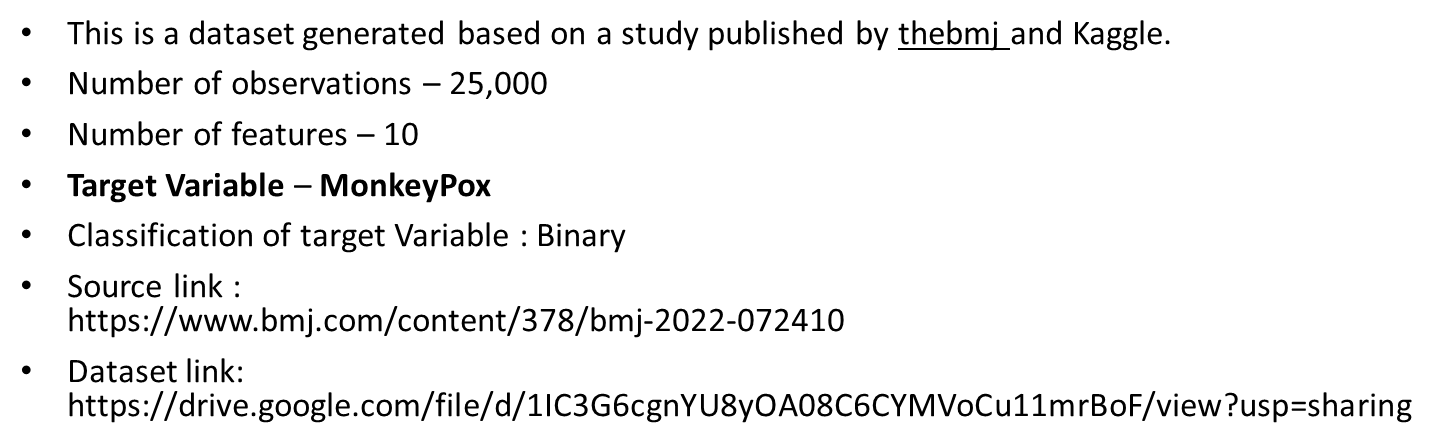
 
Our DV's are 
    •	Rectal Pain,   
    •	Sore Throat,   
    •	Penile Oedema,   
    •	Oral Lesions,   
    •	Solitary Lesion,   
    •	Swollen Tonsils,   
    •	HIV Infection,   
    •	Sexually Transmitted Infection
    
We will fit a model for 'MonkeyPox'.

# BUSINESS PROBLEM

The recent outbreak in monkey pox has resulted in huge medical complications and various businesses have been affected.      
How can we build an intelligent model that can predict if the person tests positive or negative to MonkeyPox based on the dependent variables/features?



# NEED FOR A MODEL:

In order to test for monkeypox, the healthcare provider/ physician conducts PCR by taking a swab to rub across more than 1 lesions of the rash. Then the swab is sent to the lab to detect viruses in the orthopoxviral genes.
This process typically takes 48 hours which is a huge downtime and can cost lives at times.

The importance of building resilient health systems that will accelerate the global goal of responding swiftly is a potential solution.
Monkeypox broke out in May 2022 and our motivation is to develop a predictive model which will aid the physicians to swiftly make decisions for further treatment.

# Importing Libraries

In [44]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

np.random.seed(1)

## 2) Load, Explore and Clean Data

<b> Load Data

In [45]:
df = pd.read_csv("C:/Users/harsh/ISM6136/Monkey pox dataset.csv")
df.head(5)

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,None,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,None,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


<b> Explore dataset

In [46]:
df.shape

(25000, 11)

In [48]:
df.columns

Index(['Patient_ID', 'Systemic Illness', 'Rectal Pain', 'Sore Throat',
       'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils',
       'HIV Infection', 'Sexually Transmitted Infection', 'MonkeyPox'],
      dtype='object')

In [49]:
df.describe

<bound method NDFrame.describe of       Patient_ID     Systemic Illness  Rectal Pain  Sore Throat  \
0             P0                 None        False         True   
1             P1                Fever         True        False   
2             P2                Fever        False         True   
3             P3                 None         True        False   
4             P4  Swollen Lymph Nodes         True         True   
...          ...                  ...          ...          ...   
24995     P24995                 None         True         True   
24996     P24996                Fever        False         True   
24997     P24997                 None         True         True   
24998     P24998  Swollen Lymph Nodes        False         True   
24999     P24999  Swollen Lymph Nodes        False        False   

       Penile Oedema  Oral Lesions  Solitary Lesion  Swollen Tonsils  \
0               True          True            False             True   
1               T

In [50]:
df.MonkeyPox.value_counts() #displaying the count of positives and negatives in dataset

Positive    15909
Negative     9091
Name: MonkeyPox, dtype: int64

<b> cleaning the dataset

In [51]:
df.columns = [s.strip() for s in df.columns] 
df.columns

Index(['Patient_ID', 'Systemic Illness', 'Rectal Pain', 'Sore Throat',
       'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils',
       'HIV Infection', 'Sexually Transmitted Infection', 'MonkeyPox'],
      dtype='object')

In [52]:
#Cleaning data by dropping unwanted columns
df = df.drop(columns=['Patient_ID','Systemic Illness'])
df

,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,False,True,True,True,False,True,False,False,Negative
1,True,False,True,True,False,False,True,False,Positive
2,False,True,True,False,False,False,True,False,Positive
3,True,False,False,False,True,True,True,False,Positive
4,True,True,True,False,False,True,True,False,Positive
...,...,...,...,...,...,...,...,...,...
24995,True,True,False,True,True,False,False,True,Positive
24996,False,True,True,False,True,True,True,True,Positive
24997,True,True,False,False,True,True,False,False,Positive
24998,False,True,False,True,True,True,False,False,Negative


In [53]:
# check for missing values
df.isnull().sum()

Rectal Pain                       0
Sore Throat                       0
Penile Oedema                     0
Oral Lesions                      0
Solitary Lesion                   0
Swollen Tonsils                   0
HIV Infection                     0
Sexually Transmitted Infection    0
MonkeyPox                         0
dtype: int64

In [54]:
print(df.MonkeyPox.unique())


['Negative' 'Positive']


<B> One hot encoding

Since the target variable output is not binary, we are performing one hot encoding

In [55]:
enc = OrdinalEncoder(categories=[['Negative','Positive']]) 
df.MonkeyPox = enc.fit_transform(df[['MonkeyPox']])
df.head()

,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,False,True,True,True,False,True,False,False,0.0
1,True,False,True,True,False,False,True,False,1.0
2,False,True,True,False,False,False,True,False,1.0
3,True,False,False,False,True,True,True,False,1.0
4,True,True,True,False,False,True,True,False,1.0


# 3) SPLIT DATA INTO TRAINING AND VALIDATION DATA

Split data into a 70/30 split.

In [56]:
train_df, validation_df = train_test_split(df, test_size=0.3, random_state=1)

In [57]:
X_train = train_df.drop(columns=['MonkeyPox'])
y_train = train_df.MonkeyPox
X_test = validation_df.drop(columns=['MonkeyPox'])
y_test = validation_df.MonkeyPox

<b> Data Balancing

In [58]:
train_df['MonkeyPox'].value_counts()

1.0    11084
0.0     6416
Name: MonkeyPox, dtype: int64

In [59]:
positive = train_df[train_df['MonkeyPox']=='1'] #Majority samples
negative = train_df[train_df['MonkeyPox']=='0'] #Minority samples

In [60]:
sampled_data = positive.sample(len(negative))
train_df = pd.concat([sampled_data,negative])

In [61]:
train_df['MonkeyPox'].value_counts()

Series([], Name: MonkeyPox, dtype: int64)

<b> Transform Predictors

    Knn is sensitive to change in scale and hence we need to transform everything to one scale.

In [62]:
target = 'MonkeyPox'
predictors = list(df.columns) # this will store all the column names in our csv file
predictors.remove(target)


In [63]:
scaler = StandardScaler()
scaler.fit(X_train)

# Transform the predictors of training and validation sets
X_train = scaler.transform(X_train) # train_predictors is not a numpy array

X_test = scaler.transform(X_test)

# Training model

# 1) KNN

In [64]:
# create a standard scaler and fit it to the training set of predictors
scaler = StandardScaler()
scaler.fit(X_train)

# Transform the predictors of training and validation sets
X_train = scaler.transform(X_train) # train_predictors is not a numpy array

X_test = scaler.transform(X_test)


In [65]:
k=159

In [66]:
knn = KNeighborsClassifier(n_neighbors=k,  metric='euclidean') # user euclidean distance

knn.fit(X_train,y_train)
knn_prediction_output = knn.predict(X_test)
knn_prediction_output

array([1., 1., 0., ..., 1., 1., 1.])

<b> Measuring performance of KNN

In [67]:
confusion = confusion_matrix(y_test, knn_prediction_output)
confusion

array([[ 706, 1969],
       [ 586, 4239]], dtype=int64)

In [68]:
TP = confusion[1, 1] # True Positives
TN = confusion[0, 0] # True Negatives
FP = confusion[0, 1] # False Positives
FN = confusion[1, 0] # False Negatives

In [69]:
classification_accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"Classification accuracy:{classification_accuracy:.4f}")
precision = TP / (TP + FP)
print(f"Precision:{precision:.4f}")
recall = TP / (TP + FN)
print(f"Recall:{recall:.4f}")
f1_Score = (2 * precision * recall) / (precision + recall)
print(f"f1_score:{f1_Score:.4f}")


Classification accuracy:0.6593
Precision:0.6828
Recall:0.8785
f1_score:0.7684


<b> Finding best k value

In [70]:
results = []
for k in range(1,int(len(y_train)**0.5),2):
    knn = KNeighborsClassifier(n_neighbors=k,  metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    results.append ({
        'k': k,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
results_df

,k,accuracy,precision,recall,f1
0,1,0.572000,0.669893,0.659896,0.664857
1,3,0.601467,0.673995,0.736995,0.704089
2,5,0.617333,0.675336,0.780311,0.724038
3,7,0.624400,0.686202,0.766839,0.724283
4,9,0.618667,0.682927,0.760207,0.719498
...,...,...,...,...,...
61,123,0.658000,0.680108,0.884352,0.768898
62,125,0.658133,0.679075,0.888497,0.769797
63,127,0.658000,0.680108,0.884352,0.768898
64,129,0.657733,0.680929,0.880622,0.768007


In [31]:
results_df.loc[[results_df.accuracy.idxmax()]]

,k,accuracy,precision,recall,f1
65,131,0.659067,0.679658,0.889119,0.770405


We got best fit for k = 131 where recall score was 88.9119%, precisiom = 67.96%

In [73]:
knn_precision = precision_score(y_test, y_pred)
knn_precision

0.6796577946768061

In [75]:
knn_accuracy = accuracy_score(y_test, y_pred)
knn_accuracy

0.6590666666666667

# Hyperparameter tuning with knn

In [76]:
score_measure = 'precision'
k = 5
# Start with an initial guess for parameters
param_grid = {
             'n_neighbors': [2,5,10,15, 30, 45, 64],
             'leaf_size':[2,5,10,15,20,25,30],
             }

gridSearch1 = GridSearchCV(KNeighborsClassifier(), param_grid, cv=k, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch1.fit(X_train, y_train)
print(score_measure, 'score: ', gridSearch1.best_score_)
print('parameters: ', gridSearch1.best_params_)

bestRecalTree = gridSearch1.best_estimator_


precision score:  0.6888947194804671
parameters:  {'leaf_size': 15, 'n_neighbors': 2}


In [78]:
score_measure = 'precision'
k = 10
# Start with an initial guess for parameters
param_grid = {
             'n_neighbors': [2,5,10,15, 30, 45, 64],
             'leaf_size':[2,5,10,15,20,25,30],
             }

gridSearch2 = GridSearchCV(KNeighborsClassifier(), param_grid, cv=k, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch2.fit(X_train, y_train)
print(score_measure, 'score: ', gridSearch2.best_score_)
print('parameters: ', gridSearch2.best_params_)

bestRecalTree = gridSearch2.best_estimator_


precision score:  0.6893252913438986
parameters:  {'leaf_size': 20, 'n_neighbors': 10}


In [83]:
score_measure = 'precision'
k = 12
# Start with an initial guess for parameters
param_grid = {
             'n_neighbors': [2,5,10,15, 30, 45, 64],
             'leaf_size':[2,5,10,15,20,25,30],
             }

gridSearch3 = GridSearchCV(KNeighborsClassifier(), param_grid, cv=k, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch3.fit(X_train, y_train)
print(score_measure, 'score: ', gridSearch3.best_score_)
print('parameters: ', gridSearch3.best_params_)

bestRecalTree = gridSearch3.best_estimator_


precision score:  0.6860375182755368
parameters:  {'leaf_size': 2, 'n_neighbors': 10}


In [84]:
score_measure = 'precision'
k = 15
# Start with an initial guess for parameters
param_grid = {
             'n_neighbors': [2,5,10,15, 30, 45, 64],
             'leaf_size':[2,5,10,15,20,25,30],
             }

gridSearch4 = GridSearchCV(KNeighborsClassifier(), param_grid, cv=k, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch4.fit(X_train, y_train)
print(score_measure, 'score: ', gridSearch4.best_score_)
print('parameters: ', gridSearch4.best_params_)

bestRecalTree = gridSearch4.best_estimator_


precision score:  0.6894634065421221
parameters:  {'leaf_size': 20, 'n_neighbors': 2}


In [86]:
hyperparameter_tuning_knn_precision = gridSearch4.best_score_
hyperparameter_tuning_knn_precision

0.6894634065421221

In [37]:
score_measure = 'accuracy'
k = 15
# Start with an initial guess for parameters
param_grid = {
             'n_neighbors': [2,5,10,15, 30, 45, 64],
             'leaf_size':[2,5,10,15,20,25,30],
             }

gridSearch4 = GridSearchCV(KNeighborsClassifier(), param_grid, cv=k, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch4.fit(X_train, y_train)
print(score_measure, 'score: ', gridSearch4.best_score_)
print('parameters: ', gridSearch4.best_params_)

bestRecalTree = gridSearch4.best_estimator_


accuracy score:  0.6645137409894648
parameters:  {'leaf_size': 20, 'n_neighbors': 64}


In [87]:
hyperparameter_tuning_knn_accuracy = gridSearch4.best_score_
hyperparameter_tuning_knn_accuracy

0.6894634065421221

We found highest precision value for k = 15 after tuning and the accuracy corresponding to k=15 after tuning is 0.6645

# 2) k fold cross validation

In [88]:
treeClassifier1 = DecisionTreeClassifier(random_state=1)
precision1 = cross_val_score(treeClassifier1, X_test, y_test, cv=5, scoring='precision')
precision1.mean()

0.6793517397010886

In [89]:
treeClassifier2 = DecisionTreeClassifier(random_state=1)
precision2 = cross_val_score(treeClassifier2, X_test, y_test, cv=10, scoring='precision')
precision2.mean()

0.6781300485781536

In [90]:
treeClassifier3 = DecisionTreeClassifier(random_state=1)
precision3 = cross_val_score(treeClassifier3, X_test, y_test, cv=15, scoring='precision')
precision3.mean()

0.6812664039946162

In [91]:
treeClassifier4 = DecisionTreeClassifier(random_state=1)
precision4 = cross_val_score(treeClassifier4, X_test, y_test, cv=12, scoring='precision')
precision4.mean()

0.6813384652975607

In [92]:
treeClassifier5 = DecisionTreeClassifier(random_state=1)
precision5 = cross_val_score(treeClassifier5, X_test, y_test, cv=13, scoring='precision')
precision5.mean()

0.6798121677604244

In [93]:
k_fold_precision = precision4.mean()
k_fold_precision

0.6813384652975607

In [94]:
treeClassifier4 = DecisionTreeClassifier(random_state=1)
precision4 = cross_val_score(treeClassifier4, X_test, y_test, cv=12, scoring='accuracy')
precision4.mean()

0.6519999999999999

In [95]:
k_fold_accuracy = precision4.mean()
k_fold_accuracy

0.6519999999999999

# K fold cross validation Hyperparameter tuned

# 3) DECISION TREE

In [97]:
features = ['Rectal Pain', 'Sore Throat',
       'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils',
       'HIV Infection', 'Sexually Transmitted Infection', 'MonkeyPox']

In [98]:
X = df[features]

In [99]:
y = df['MonkeyPox']

In [100]:
dtree = DecisionTreeClassifier()
y_pred=dtree.fit(X_train,y_train)

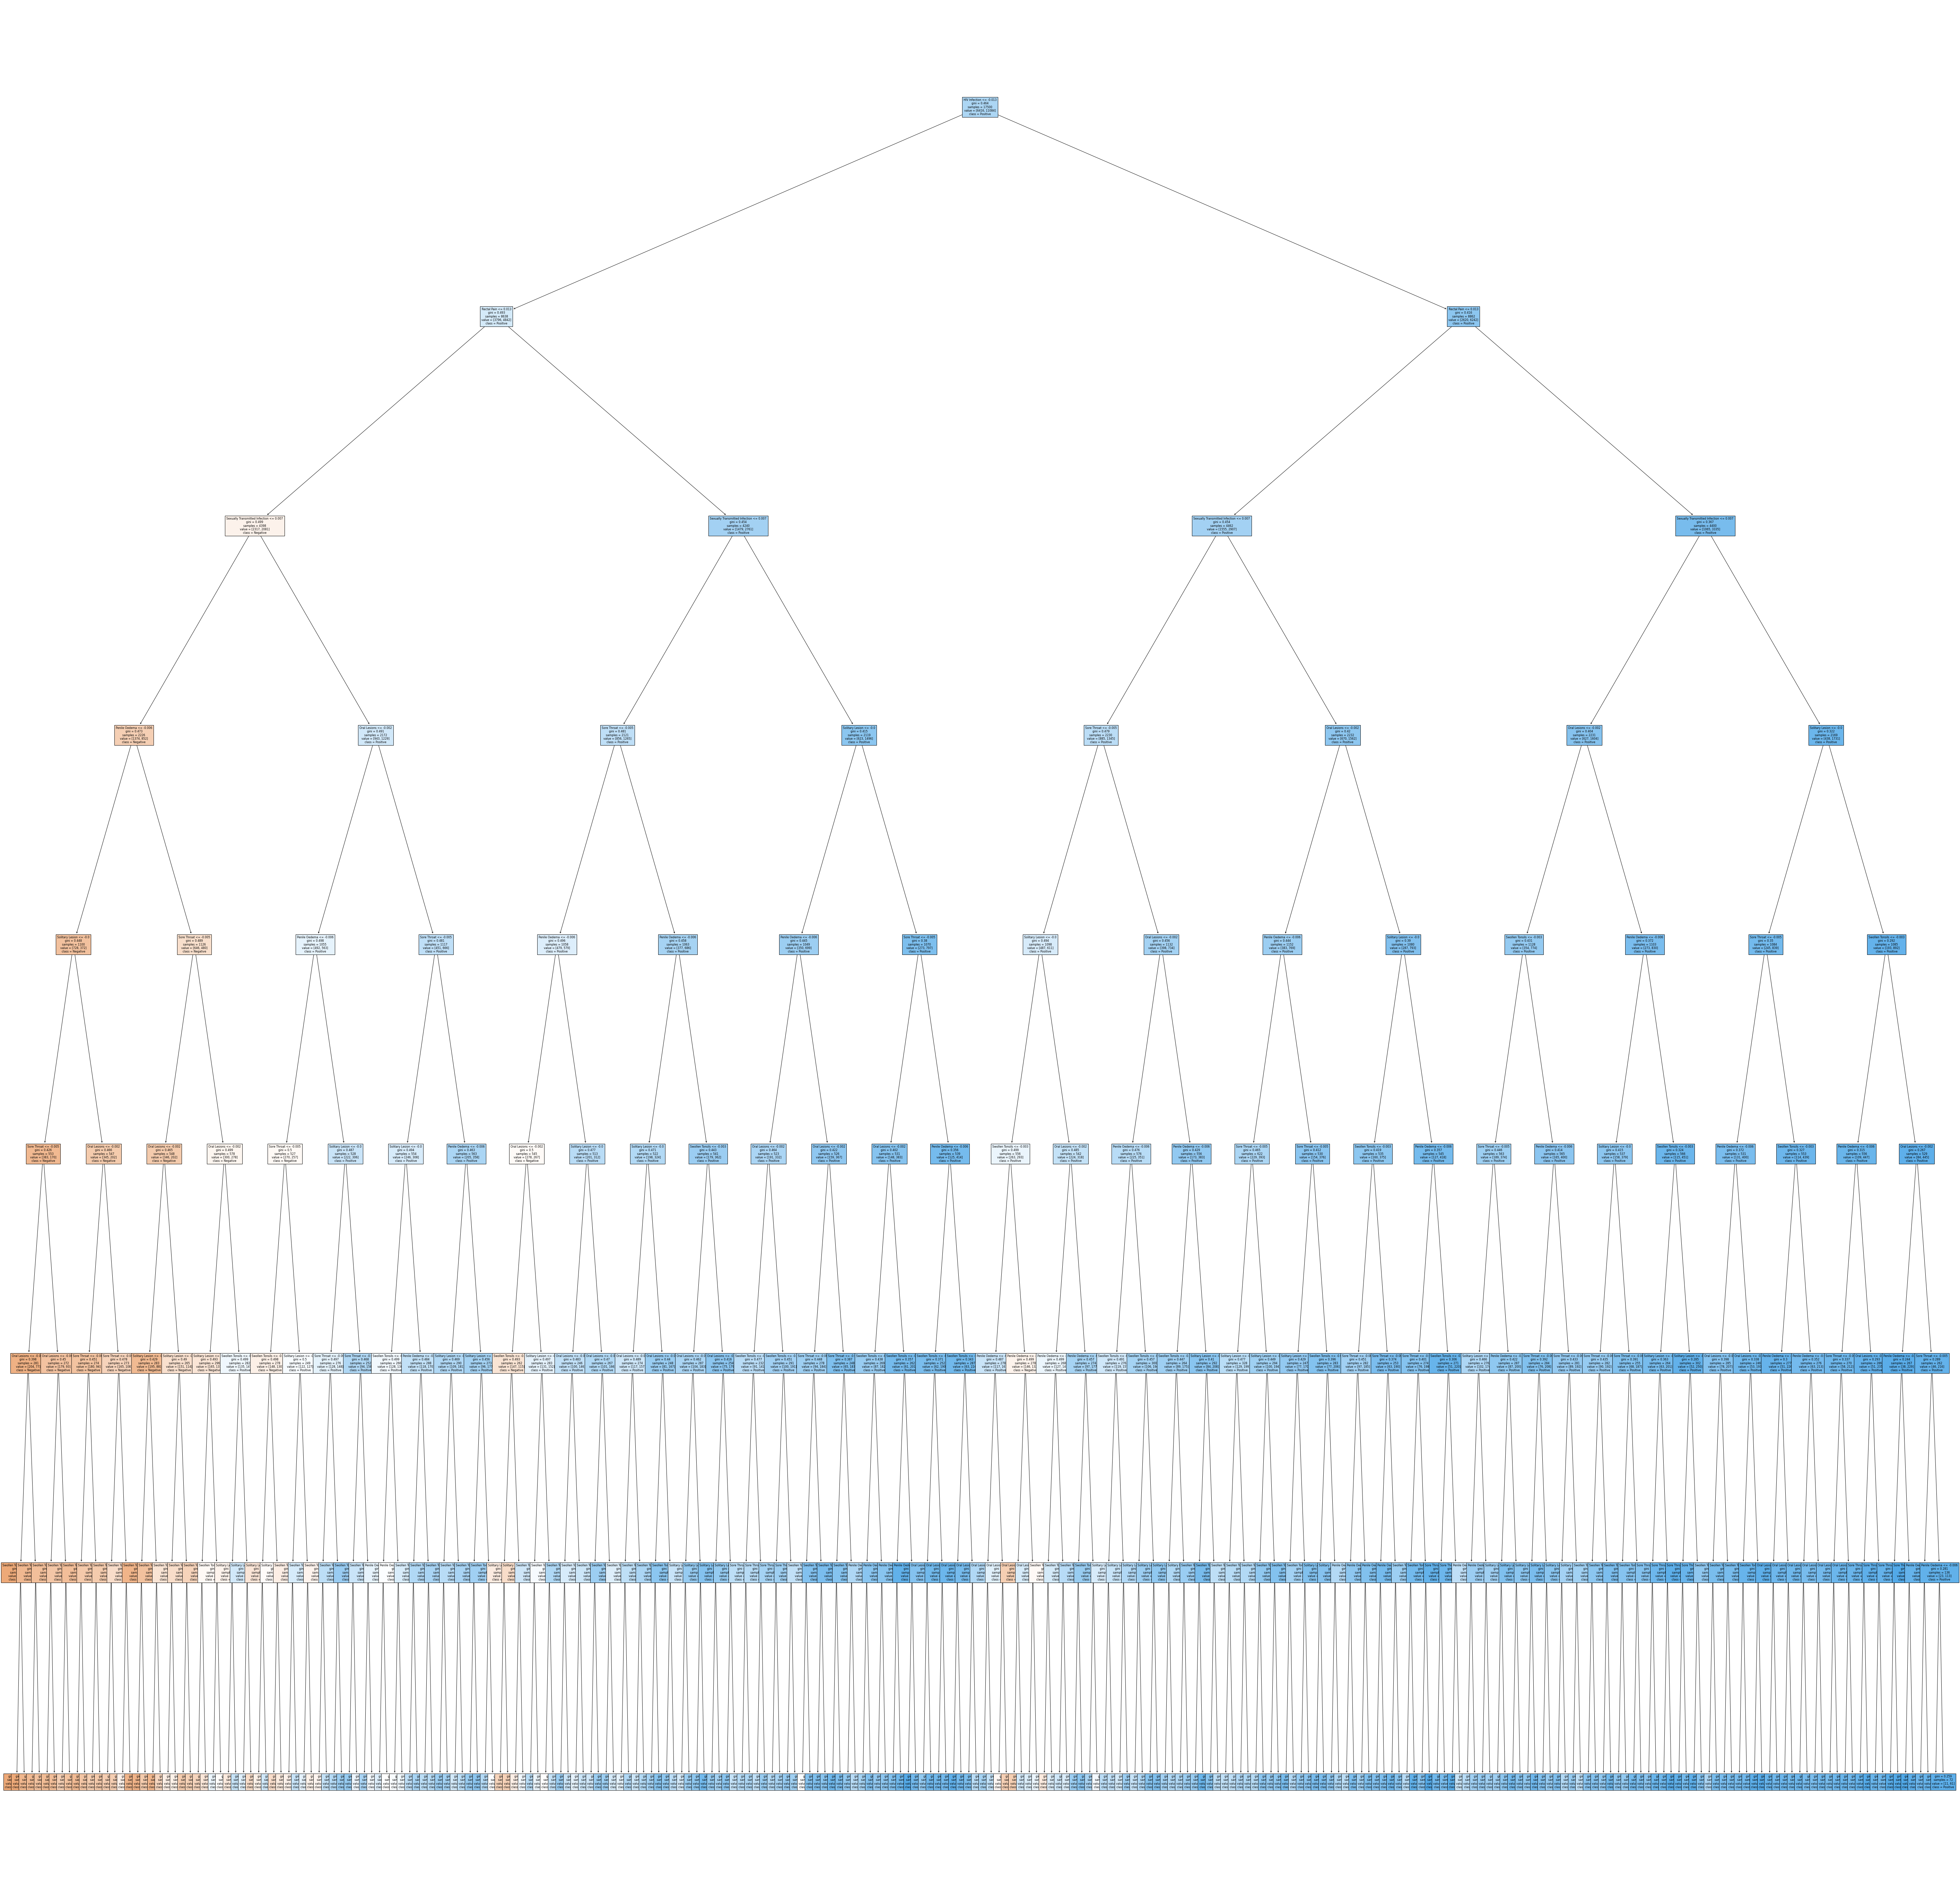

In [101]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(100,100))
_ = plot_tree(dtree, 
                feature_names=X.columns,  
                class_names=['Negative', 'Positive'],
                filled=True,
                fontsize=8
             )



In [105]:
from sklearn.tree import export_text

text_representation = export_text(dtree)

print(text_representation)

|--- feature_6 <= -0.01
|   |--- feature_0 <= 0.01
|   |   |--- feature_7 <= 0.01
|   |   |   |--- feature_2 <= -0.01
|   |   |   |   |--- feature_4 <= -0.00
|   |   |   |   |   |--- feature_1 <= -0.00
|   |   |   |   |   |   |--- feature_3 <= -0.00
|   |   |   |   |   |   |   |--- feature_5 <= -0.00
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- feature_5 >  -0.00
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- feature_3 >  -0.00
|   |   |   |   |   |   |   |--- feature_5 <= -0.00
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- feature_5 >  -0.00
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_1 >  -0.00
|   |   |   |   |   |   |--- feature_3 <= -0.00
|   |   |   |   |   |   |   |--- feature_5 <= -0.00
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- feature_5 >  -0.00
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   | 

In [108]:
y_pred = dtree.predict(X_test)

In [109]:
print("Decision Tree Accuracy:", dtree.score(X_test, y_test))
print("Decision Tree confusion matrix:",confusion_matrix(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred))
print("Recall Score : ",recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("F1 score:",f1_score(y_test,y_pred))

Decision Tree Accuracy: 0.6561333333333333
Decision Tree confusion matrix: [[ 720 1955]
 [ 624 4201]]
Precision Score :  0.6824236517218973
Recall Score :  0.8706735751295337
              precision    recall  f1-score   support

         0.0       0.54      0.27      0.36      2675
         1.0       0.68      0.87      0.77      4825

    accuracy                           0.66      7500
   macro avg       0.61      0.57      0.56      7500
weighted avg       0.63      0.66      0.62      7500

F1 score: 0.7651397869046535


In [110]:
dtree_precision = precision_score(y_test, y_pred)

In [111]:
dtree_precision

0.6824236517218973

In [112]:
dtree_accuracy = accuracy_score(y_test, y_pred)
dtree_accuracy

0.6561333333333333

The precision and accuracy for DecisionTree model is 0.6824 and 0.6561 respectively.

#  Hyperparameter Tuning with GridSearchCV for Dtree

In [113]:
score_measure = 'precision'
k = 5
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [2,3,4,5,6,7,8,9,10,20,25,30], 
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=k, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(X_train, y_train)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestRecalTree = gridSearch.best_estimator_


precision score:  0.6871581751949881
parameters:  {'max_depth': 2, 'min_impurity_decrease': 0, 'min_samples_split': 2}


In [114]:
score_measure = 'precision'
k = 10
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [2,3,4,5,6,7,8,9,10,20,25,30], 
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=k, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(X_train, y_train)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestRecalTree = gridSearch.best_estimator_


precision score:  0.687162200962325
parameters:  {'max_depth': 2, 'min_impurity_decrease': 0, 'min_samples_split': 2}


In [115]:
score_measure = 'precision'
k = 15
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [2,3,4,5,6,7,8,9,10,20,25,30], 
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=k, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(X_train, y_train)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestRecalTree = gridSearch.best_estimator_


precision score:  0.6872148819746553
parameters:  {'max_depth': 2, 'min_impurity_decrease': 0, 'min_samples_split': 2}


In [116]:
score_measure = 'precision'
k = 20
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [2,3,4,5,6,7,8,9,10,20,25,30], 
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001], 
}
gridSearch1 = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=k, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch1.fit(X_train, y_train)
print(score_measure, 'score: ', gridSearch1.best_score_)
print('parameters: ', gridSearch1.best_params_)

bestRecalTree = gridSearch1.best_estimator_


precision score:  0.6872587147619785
parameters:  {'max_depth': 2, 'min_impurity_decrease': 0, 'min_samples_split': 2}


In [64]:
dtree_tuned_precision = gridSearch1.best_score_
dtree_tuned_precision

0.6872587147619785

In [65]:
score_measure = 'accuracy'
k = 20
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [2,3,4,5,6,7,8,9,10,20,25,30], 
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001], 
}
gridSearch1 = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=k, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch1.fit(X_train, y_train)
print(score_measure, 'score: ', gridSearch1.best_score_)
print('parameters: ', gridSearch1.best_params_)

bestRecalTree = gridSearch1.best_estimator_


accuracy score:  0.6667428571428571
parameters:  {'max_depth': 7, 'min_impurity_decrease': 0, 'min_samples_split': 2}


In [117]:
dtree_tuned_accuracy = gridSearch1.best_score_
dtree_tuned_accuracy

0.6872587147619785

 we have high precision score for k = 20 when 'max_depth': 2, 'min_impurity_decrease': 0, 'min_samples_split': 2

# 4) Logistic Regression

In [118]:
from sklearn.linear_model import LogisticRegression
logClassifier=LogisticRegression(random_state=1) # Create the model
log_output = logClassifier.fit(X_train,y_train) # fitting the model


In [120]:
y_pred = logClassifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("***********************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred):.3f}")
print("***********************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred):.3f}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred):.3f}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred):.3f}")
print("***********************")

[[ 724 1951]
 [ 597 4228]]
***********************
Recall Score:     0.876
***********************
Accuracy Score:   0.660
Precision Score:  0.684
F1 Score:         0.768
***********************


In [123]:
log_reg_precision = precision_score(y_test, y_pred)
log_reg_accuracy = accuracy_score (y_test, y_pred)

In [124]:
log_reg_precision

0.68425311539084

In [125]:
log_reg_accuracy

0.6602666666666667

In [126]:
THRESHOLD = 0.50
y_pred_dthreshold50 = np.where(logClassifier.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
pd.DataFrame({"predicted":y_pred_dthreshold50,"actual":y_test})

,predicted,actual
21492,1,1.0
9488,1,1.0
16933,0,0.0
12604,1,0.0
8222,1,1.0
...,...,...
13410,1,1.0
13158,1,1.0
3552,1,1.0
23203,1,1.0


In [127]:
y_pred = np.where(logClassifier.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
print(confusion_matrix(y_test, y_pred_dthreshold50))
print("***********************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred_dthreshold50):.3f}")
print("***********************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred_dthreshold50):.3f}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred_dthreshold50):.3f}")
print(f"{'F1 Score: ':18}{f1_score(y_test,y_pred_dthreshold50):.3f}")
print("***********************")

[[ 724 1951]
 [ 597 4228]]
***********************
Recall Score:     0.876
***********************
Accuracy Score:   0.660
Precision Score:  0.684
F1 Score:         0.768
***********************


In [128]:
log_precision_t50 = precision_score(y_test, y_pred_dthreshold50)
log_precision_t50

0.68425311539084

In [129]:
log_accuracy_t50 = accuracy_score(y_test, y_pred_dthreshold50)
log_accuracy_t50

0.6602666666666667

#  Logistic Regression with hyperparameter tuning

In [130]:
param_grid = { 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                      'penalty': ['l1', 'l2', 'none'], # NOTE: 'elasticnet' is only supported by 'saga' solver
                      'C': [100, 10, 1.0, 0.1, 0.01,0.001,0.0001],
                      'max_iter': [500000] # number of iterations to converge (sometimes the default is not enough - and sometimes, it will never converge)
                     }

In [132]:
best_logClassifer = GridSearchCV(estimator=LogisticRegression(random_state=1),
                                    scoring='precision', param_grid=param_grid, 
                                    cv=2, verbose=0,  n_jobs = -1)
best_logClassifer = best_logClassifer.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
56 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
Valu

In [133]:
y_pred = best_logClassifer.predict(X_test)
print("***********************")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred):.3f}")
print("***********************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred):.3f}")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred):.3f}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred):.3f}")
print("***********************")


***********************
Precision Score:  0.684
***********************
Accuracy Score:   0.660
Recall Score:     0.876
F1 Score:         0.768
***********************


In [134]:
logistic_reg_tuned_precision = precision_score(y_test,y_pred)
logistic_reg_tuned_precision

0.68425311539084

In [135]:
logistic_reg_tuned_accuracy = accuracy_score(y_test,y_pred)
logistic_reg_tuned_accuracy

0.6602666666666667

# 5) AdaBoost

In [83]:
aboost = AdaBoostClassifier(random_state=1)

# as with most classifiers, you can experiment with the parameter values
#aboost = AdaBoostClassifier(random_state=random_seed, base_estimator=DecisionTreeClassifier(max_depth=4, random_state=random_seed))
#aboost = AdaBoostClassifier(random_state=random_seed, n_estimators=1000)

In [84]:
_ = aboost.fit(X_train,y_train)

In [85]:
y_pred = aboost.predict(X_test)

In [86]:
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred)}")
print("************************************")
print(f"{'>> Recall Score:':18}{recall_score(y_test, y_pred)}")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred)}")


      Model             Score       
************************************
Precision Score:  0.6828094932649134
************************************
>> Recall Score:  0.8824870466321244
Accuracy Score:   0.6606666666666666
Precision Score:  0.6828094932649134


In [87]:
adaboost_precision = precision_score(y_test, y_pred)
adaboost_precision

0.6828094932649134

In [88]:
adaboost_accuracy =accuracy_score(y_test, y_pred)
adaboost_accuracy

0.6606666666666666

# Hyperparameter tuning with ADAboost

In [89]:
score_measure = 'precision'
k = 5
# Start with an initial guess for parameters
param_grid = {'n_estimators': [20, 50, 70, 100],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    'n_estimators' : [100, 200, 300, 400, 500]}


gridSearch1 = GridSearchCV(AdaBoostClassifier(random_state=1), param_grid, cv=k, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch1.fit(X_train, y_train)
print(score_measure, 'score: ', gridSearch1.best_score_)
print('parameters: ', gridSearch1.best_params_)

bestRecalTree = gridSearch1.best_estimator_


precision score:  0.6797008280508062
parameters:  {'learning_rate': 0.1, 'n_estimators': 400}


In [90]:
score_measure = 'precision'
k = 15
# Start with an initial guess for parameters
param_grid = {'n_estimators': [20, 50, 70, 100],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    'n_estimators' : [100, 200, 300, 400, 500]}


gridSearch3 = GridSearchCV(AdaBoostClassifier(random_state=1), param_grid, cv=k, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch3.fit(X_train, y_train)
print(score_measure, 'score: ', gridSearch3.best_score_)
print('parameters: ', gridSearch3.best_params_)

bestRecalTree = gridSearch3.best_estimator_


precision score:  0.6799200758754569
parameters:  {'learning_rate': 0.1, 'n_estimators': 500}


In [91]:
score_measure = 'precision'
k = 20
# Start with an initial guess for parameters
param_grid = {'n_estimators': [20, 50, 70, 100],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    'n_estimators' : [100, 200, 300, 400, 500]}


gridSearch4 = GridSearchCV(AdaBoostClassifier(random_state=1), param_grid, cv=k, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch4.fit(X_train, y_train)
print(score_measure, 'score: ', gridSearch4.best_score_)
print('parameters: ', gridSearch4.best_params_)

bestRecalTree = gridSearch4.best_estimator_


precision score:  0.6799438464666002
parameters:  {'learning_rate': 0.2, 'n_estimators': 300}


In [92]:
adaboost_tuned_precision = gridSearch4.best_score_
adaboost_tuned_precision

0.6799438464666002

In [93]:
score_measure = 'accuracy'
k = 20
# Start with an initial guess for parameters
param_grid = {'n_estimators': [20, 50, 70, 100],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    'n_estimators' : [100, 200, 300, 400, 500]}


gridSearch5 = GridSearchCV(AdaBoostClassifier(random_state=1), param_grid, cv=k, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch5.fit(X_train, y_train)
print(score_measure, 'score: ', gridSearch5.best_score_)
print('parameters: ', gridSearch5.best_params_)

bestRecalTree = gridSearch5.best_estimator_


accuracy score:  0.6665142857142857
parameters:  {'learning_rate': 0.2, 'n_estimators': 300}


In [94]:
adaboost_tuned_accuracy = gridSearch5.best_score_
adaboost_tuned_accuracy

0.6665142857142857

# 6) GradientDescent

In [95]:
gboost = GradientBoostingClassifier(random_state=1)

In [96]:
_ = gboost.fit(X_train, y_train)

In [97]:
y_pred = gboost.predict(X_test)

In [98]:
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'>> Recall Score:':18}{recall_score(y_test, y_pred)}")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred)}")

      Model             Score       
************************************
>> Recall Score:  0.886839378238342
Accuracy Score:   0.6581333333333333
Precision Score:  0.67952993488963
F1 Score:         0.7694659233950729


In [99]:
gboost_precision = precision_score(y_test, y_pred)
gboost_precision

0.67952993488963

In [100]:
gboost_accuracy = accuracy_score(y_test, y_pred)
gboost_accuracy

0.6581333333333333

# Hyperparameter tuning - GradientDescent

In [101]:
score_measure = 'precision'
k = 2
# Start with an initial guess for parameters
param_grid = {'n_estimators': [20, 50, 70, 100],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    'n_estimators' : [100, 200, 300, 400, 500]}


gridSearch5 = GridSearchCV(GradientBoostingClassifier(random_state=1), param_grid, cv=k, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch5.fit(X_train, y_train)
print(score_measure, 'score: ', gridSearch5.best_score_)
print('parameters: ', gridSearch5.best_params_)

bestRecalTree = gridSearch5.best_estimator_


precision score:  0.6790156797506883
parameters:  {'learning_rate': 0.1, 'n_estimators': 200}


In [102]:
score_measure = 'precision'
k = 5
# Start with an initial guess for parameters
param_grid = {'n_estimators': [20, 50, 70, 100],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    'n_estimators' : [100, 200, 300, 400, 500]}


gridSearch1 = GridSearchCV(GradientBoostingClassifier(random_state=1), param_grid, cv=k, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch1.fit(X_train, y_train)
print(score_measure, 'score: ', gridSearch1.best_score_)
print('parameters: ', gridSearch1.best_params_)

bestRecalTree = gridSearch1.best_estimator_


precision score:  0.6790398029708837
parameters:  {'learning_rate': 0.1, 'n_estimators': 300}


In [103]:
score_measure = 'precision'
k = 6
# Start with an initial guess for parameters
param_grid = {'n_estimators': [20, 50, 70, 100],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    'n_estimators' : [100, 200, 300, 400, 500]}


gridSearch4 = GridSearchCV(GradientBoostingClassifier(random_state=1), param_grid, cv=k, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch4.fit(X_train, y_train)
print(score_measure, 'score: ', gridSearch4.best_score_)
print('parameters: ', gridSearch4.best_params_)

bestRecalTree = gridSearch4.best_estimator_


precision score:  0.6786154627798542
parameters:  {'learning_rate': 0.2, 'n_estimators': 100}


In [104]:
score_measure = 'precision'
k = 10
# Start with an initial guess for parameters
param_grid = {'n_estimators': [20, 50, 70, 100],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    'n_estimators' : [100, 200, 300, 400, 500]}


gridSearch2 = GridSearchCV(GradientBoostingClassifier(random_state=1), param_grid, cv=k, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch2.fit(X_train, y_train)
print(score_measure, 'score: ', gridSearch2.best_score_)
print('parameters: ', gridSearch2.best_params_)

bestRecalTree = gridSearch2.best_estimator_


precision score:  0.6784334883748108
parameters:  {'learning_rate': 0.3, 'n_estimators': 100}


In [105]:
gboost_tuned_precision = gridSearch1.best_score_
gboost_tuned_precision

0.6790398029708837

In [106]:
score_measure = 'accuracy'
k = 5
# Start with an initial guess for parameters
param_grid = {'n_estimators': [20, 50, 70, 100],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    'n_estimators' : [100, 200, 300, 400, 500]}


gridSearch1 = GridSearchCV(GradientBoostingClassifier(random_state=1), param_grid, cv=k, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch1.fit(X_train, y_train)
print(score_measure, 'score: ', gridSearch1.best_score_)
print('parameters: ', gridSearch1.best_params_)

bestRecalTree = gridSearch1.best_estimator_


accuracy score:  0.6668000000000001
parameters:  {'learning_rate': 0.1, 'n_estimators': 500}


In [107]:
gboost_tuned_accuracy = gridSearch1.best_score_
gboost_tuned_accuracy

0.6668000000000001

# ARTIFICIAL NEURAL NETWORKS

<b> Combination 1 for hidden layers of Neural Network :

In [123]:
hidden_layor_1=  ( 400, 300, 200, 100, 50)

In [82]:
%%time
%%capture --no-display

ann = MLPClassifier(hidden_layer_sizes= hidden_layor_1, solver='adam', max_iter=400)
_ = ann.fit(X_train, y_train)

NameError: name 'hidden_layor_1' is not defined

Wall time: 15.6 ms


In [127]:
%%time

y_pred = ann.predict(X_test)

CPU times: total: 469 ms
Wall time: 69.8 ms


In [132]:
print("recall score:",recall_score(y_test,y_pred))
print("accuracy :",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred))


recall score: 0.8723316062176166
accuracy : 0.6550666666666667
precision score: 0.6810679611650485


In [133]:
neural_1layer_precision = precision_score(y_test,y_pred)
neural_1layer_precision

0.6810679611650485

In [134]:
neural_1layer_accuracy = accuracy_score(y_test,y_pred)
neural_1layer_accuracy

0.6550666666666667

In [300]:
neural_1layer_recall = recall_score(y_test,y_pred)
neural_1layer_recall

0.875440414507772

<b> Combination 2 for hidden layers of Neural Network (2,12)

In [237]:
%%time

ann_2 = MLPClassifier(hidden_layer_sizes=(2,12), solver='adam', max_iter=200)
_ = ann_2.fit(X_train, y_train)

CPU times: total: 1.31 s
Wall time: 1.32 s


In [238]:
%%time

y_pred_ann_2 = ann_2.predict(X_test)

CPU times: total: 15.6 ms
Wall time: 7.79 ms


In [239]:
ANN_2 = []
ANN_2.append({  'Model' : 'Neural Network-2', 
                'Accuracy': accuracy_score(y_test, y_pred_ann_2),
                'Precision': precision_score(y_test, y_pred_ann_2),
                'Recall':recall_score(y_test, y_pred_ann_2),
                'F1': f1_score(y_test,y_pred_ann_2)
                
})

In [243]:
ANN_2_scores= pd.DataFrame(ANN_2)
ANN_2_scores

,Model,Accuracy,Precision,Recall,F1
0,Neural Network-2,0.6568,0.689702,0.848083,0.760736


In [252]:
neural_2layer_accuracy = ANN_2_scores[['Accuracy']]
neural_2layer_accuracy

,Accuracy
0,0.6568


In [294]:
neural_2layer_precision = ANN_2_scores[['Precision']]
neural_2layer_precision

,Precision
0,0.689702


In [298]:
neural_2layer_recall = ANN_2_scores[['Recall']]
neural_2layer_recall

,Recall
0,0.848083


<b> Combination 3 for hidden layers of Neural Network (14,10,8)

In [270]:
%%time

ann_1 = MLPClassifier(hidden_layer_sizes=(8,5,8), solver='adam', max_iter=200)
_ = ann_1.fit(X_train, y_train)

CPU times: total: 1.77 s
Wall time: 1.76 s


In [271]:
%%time

y_pred_ann_1 = ann_1.predict(X_test)

CPU times: total: 0 ns
Wall time: 1.98 ms


In [272]:
ANN_1 = []
ANN_1.append({  'Model' : 'Neural Network-1', 
                'Accuracy': accuracy_score(y_test, y_pred_ann_1),
                'Precision': precision_score(y_test, y_pred_ann_1),
                'Recall':recall_score(y_test, y_pred_ann_1),
                'F1': f1_score(y_test,y_pred_ann_1)
                
})

In [273]:
ANN_1_scores= pd.DataFrame(ANN_1)
ANN_1_scores

,Model,Accuracy,Precision,Recall,F1
0,Neural Network-1,0.6572,0.68415,0.867772,0.765098


In [295]:
neural_3layer_precision = ANN_1_scores[['Precision']]
neural_3layer_precision

,Precision
0,0.68415


In [296]:
neural_3layer_accuracy = ANN_1_scores[['Accuracy']]
neural_3layer_accuracy

,Accuracy
0,0.6572


In [297]:
neural_3layer_recall = ANN_1_scores[['Recall']]
neural_3layer_recall

,Recall
0,0.867772


# SUMMARY

In [313]:
print("Precision and accuracy scores...")
print("**********************")
print(f"{'knn precision:' :75}{knn_precision}")
print(f"{'knn accuracy:' :75}{knn_accuracy}")
print(f"{'hyperparameter tuned knn - precision:' :75}{hyperparameter_tuning_knn_precision}")
print(f"{'hyperparameter tuned knn - accuracy:' :75}{hyperparameter_tuning_knn_accuracy}")

print("**********************")
print(f"{'k fold cross validation precision:' :75}{k_fold_precision}")
print(f"{'k fold cross validation precision:' :75}{k_fold_accuracy}")

print("**********************")
print(f"{'Decision Tree- precision:':75}{dtree_precision}")
print(f"{'Decision Tree - accuracy:':75}{dtree_accuracy}")
print(f"{'Hyperparameter tuned Decision Tree - precision:':75}{dtree_tuned_precision}")
print(f"{'Hyperparameter tuned Decision Tree - accuracy:':75}{dtree_tuned_accuracy}")

print("**********************")

print(f"{'Logistic Regression precision:':75}{log_reg_precision}")
print(f"{'Logistic Regression accuracy:':75}{log_reg_accuracy}")
print(f"{'Logistic Regression when threshold is 50 -  precision:':75}{log_precision_t50}")
print(f"{'Logistic Regression when threshold is 50 -  accuracy:':75}{log_accuracy_t50}")
print(f"{'Hyperparameter tuned logistic regression - precision:':75}{logistic_reg_tuned_precision}")
print(f"{'Hyperparameter tuned logistic regression - accuracy:':75}{logistic_reg_tuned_accuracy}")


print("**********************")
print(f"{'Ada Boosted - precision:':75}{adaboost_precision}")
print(f"{'Ada Boosted - accuracy:':75}{adaboost_accuracy}")
print(f"{'Hyperparameter tuned Ada Boosted - precision:':75}{adaboost_tuned_precision}")
print(f"{'Hyperparameter tuned Ada Boosted - accuracy:':75}{adaboost_tuned_accuracy}")


print("**********************")
print(f"{'Gradient Descent precision:':75}{gboost_precision}")
print(f"{'Gradient Descent accuracy:':75}{gboost_accuracy}")
print(f"{'Hyperparameter tuned Gradient Descent precision:':75}{gboost_tuned_precision}")
print(f"{'Hyperparameter tuned Gradient Descent accuracy:':75}{gboost_tuned_accuracy}")

print("**********************")
print(f"{'ANN with 1 hidden layer - precision:':75}{neural_1layer_precision}")
print(f"{'ANN with 1 hidden layer - accuracy:':75}{neural_1layer_accuracy}")
print(f"{'ANN with 2 hidden layer - precision:':75}{ANN_2_scores[['Precision']]}")
print(f"{'ANN with 2 hidden layer - accuracy:':75}{ANN_2_scores[['Accuracy']]}")
print(f"{'ANN with 3 hidden layer - precision:':75}{ANN_1_scores[['Precision']]}")
print(f"{'ANN with 3 hidden layer - accuracy:':75}{ANN_1_scores[['Accuracy']]}")




Precision and accuracy scores...
**********************
knn precision:                                                             0.6796577946768061
knn accuracy:                                                              0.6590666666666667
hyperparameter tuned knn - precision:                                      0.6894634065421221
hyperparameter tuned knn - accuracy:                                       0.6645137409894648
**********************
k fold cross validation precision:                                         0.6813384652975607
k fold cross validation precision:                                         0.6519999999999999
**********************
Decision Tree- precision:                                                  0.6824236517218973
Decision Tree - accuracy:                                                  0.6561333333333333
Hyperparameter tuned Decision Tree - precision:                            0.6872587147619785
Hyperparameter tuned Decision Tree - accuracy:      

# ANALYSIS

The main contribution of this assignment is to implement elegant learning algorithms on Global monkey pox patients dataset from Kaggle  to observe the variation of metrics for each of the algorithms on the dataset. Out of all the precision, recall, f1_score and accuracy metrics, we found that for this dataset, "precision" is a good metric to compare the different model performances. 

Analyzing the metrics of the algorithms will give us a brief idea about the relationship of the machine learning algorithms and the data dimensionality. All the algorithms are developed in python. Upon metrics observation, the comparison can be built among knn, decision tree, random forest, adaboost, gradient descent, XGboost,k fold cross validation and hyper parameter tuning with GridSearchCV. All these six algorithms in machine learning have been showing their powerful impacts on the classification of data in various sectors. 

After importing the data, we preprocessed it by cleaning it, splitting into training and validation datasets. Since there was data imbalance, we used sampling technique to make the positive and negative samples equal in number.

Out of all the precision, recall, f1_score and accuracy metrics, we found that for this dataset, "recall" is a good metric to compare above model performances. 

<b>Hence we provided the summarized results in the end and found that the Hyperparameter tuning with GridSearchCV had the highest recall score of "92.313%" when parameters were 'max_depth': 10, 'min_impurity_decrease': 0.001, 'min_samples_split': 2.